In [1]:
from fastai.vision.all import *


In [2]:
#Download data from paper

data_dir = Path("finland_bugs")

In [3]:
files = get_image_files(data_dir)
len(files)

15074

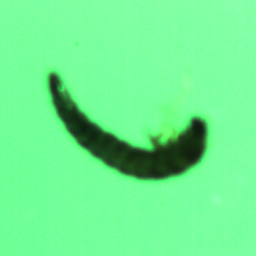

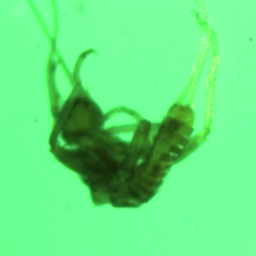

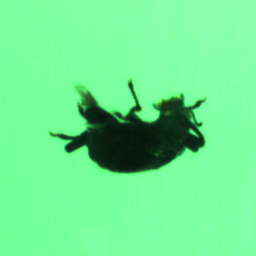

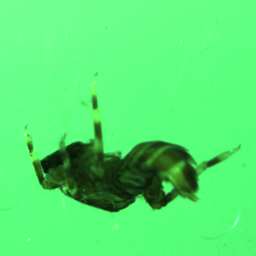

In [4]:
from IPython.display import Image
from IPython.display import display

random_imgs = random.choices(files, k=4)

imgs_list = [Image(i, width = 140) for i in random_imgs] 

display(*imgs_list)

In [10]:
dataloaders = ImageDataLoaders.from_folder(path=data_dir, 
                                           valid_pct=0.2,
                                           bs=64,
                                           item_tfms=Resize(224, method = ResizeMethod.Squish), 
                                           batch_tfms=aug_transforms(flip_vert=True),
                                           seed=42) #set.seed?

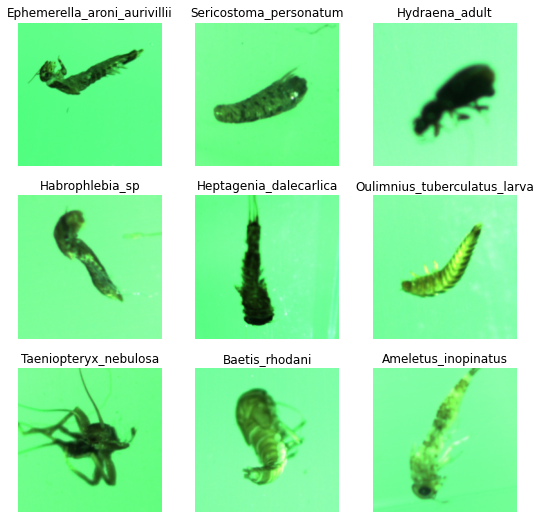

In [11]:
dataloaders.show_batch()

In [12]:
len(dataloaders.vocab)


64

In [13]:
learn_1 = cnn_learner(dataloaders, resnet34, metrics=error_rate, loss_func=LabelSmoothingCrossEntropy(), path = Path()) #.to_fp16()


In [14]:
learn_1.fine_tune(10, base_lr=0.001, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,4.642336,2.991895,0.672528,00:35
1,3.160760,2.181240,0.463172,00:35
2,2.597779,1.928664,0.377571,00:36


epoch,train_loss,valid_loss,error_rate,time
0,2.237566,1.751073,0.310219,00:45
1,2.021488,1.623070,0.277372,00:45
2,1.815255,1.539479,0.250166,00:45
3,1.620365,1.469214,0.220637,00:45
4,1.490309,1.404778,0.202057,00:45
5,1.401851,1.336458,0.175846,00:45
6,1.309083,1.331276,0.174851,00:45
7,1.256829,1.310092,0.170206,00:45
8,1.215662,1.303455,0.165229,00:45
9,1.198373,1.308930,0.167883,00:45


In [15]:
#dk data 
dk_data = Path("dk_bugs")
dk_dataloaders = ImageDataLoaders.from_folder(path=dk_data,
                                              valid_pct=0.2,
                                              bs=64,
                                              item_tfms=Resize(224*3),
                                              batch_tfms=aug_transforms(mult=2, size=224, min_scale=0.85, flip_vert=True))

In [16]:
#save weights
learn_1.model[-1][-1]=nn.Linear(in_features=512, out_features=len(dk_dataloaders.vocab), bias=False)
learn_1.save("resnet34-finland")

Path('models/resnet34-finland.pth')

In [17]:
learn_2 = cnn_learner(dk_dataloaders, resnet34, metrics=error_rate, loss_func=LabelSmoothingCrossEntropy(), path = Path())
learn_2.load("resnet34-finland")

In [ ]:
learn_2.fine_tune(10, base_lr=0.001, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,3.203181,2.873818,0.846154,00:09
1,2.863330,1.857037,0.319527,00:08
2,2.351793,1.192434,0.201183,00:08


epoch,train_loss,valid_loss,error_rate,time
0,1.243843,1.130516,0.183432,00:09
1,1.190114,1.019748,0.142012,00:09
2,1.130587,0.927434,0.094675,00:09
3,1.069225,0.854142,0.082840,00:09
4,1.011021,0.803118,0.047337,00:09


In [ ]:
learn_2.save("resnet34-finland-dk")

SuggestedLRs(valley=0.0008317637839354575)

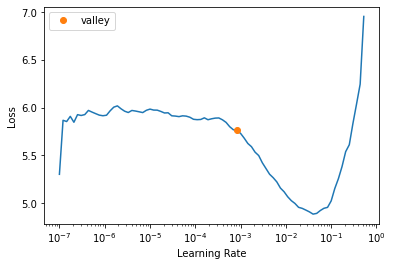

In [8]:
learn.freeze()
learn.lr_find()


In [9]:
learn.freeze()
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.638209,0.935421,0.278368,01:16
1,0.998438,0.654695,0.204711,01:16


SuggestedLRs(valley=2.511886486900039e-05)

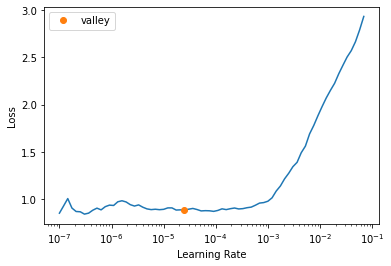

In [10]:
learn.unfreeze()
learn.lr_find()


In [11]:
learn.unfreeze()
learn.fit_one_cycle(2, 3e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.867936,0.524346,0.165892,01:35
1,0.653459,0.455581,0.140345,01:36


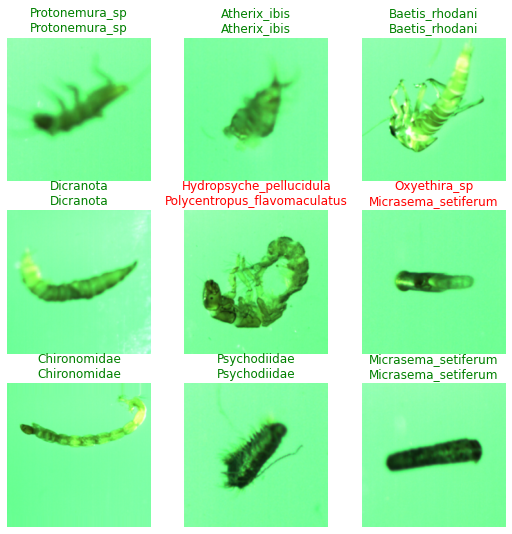

In [34]:
learn.show_results()


In [13]:
learn.export()

In [35]:
learn_inf = load_learner('export.pkl')


In [36]:
#https://github.com/fastai/fastbook/blob/master/02_production.ipynb

In [37]:
import ipywidgets as widgets


In [38]:
btn_upload = widgets.FileUpload()


In [39]:
#img = PILImage.create(btn_upload.data[-1])


In [40]:
out_pl = widgets.Output()
#out_pl.clear_output()
#with out_pl: 
#    display(img.to_thumb(128,128))
#out_pl

In [41]:
#pred, pred_idx, probs = learn_inf.predict(img)


In [42]:
lbl_pred = widgets.Label()
#lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
#lbl_pred

In [43]:
btn_run = widgets.Button(description='Classify')
#btn_run

In [44]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: 
        display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [45]:
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [46]:
widgets.VBox([widgets.Label('Select your bug!'), 
      btn_upload, btn_run, out_pl, lbl_pred])